# <center><h2> Predict the Survival of Titanic Passengers </h1></center>

# Problem Description: 

### Given a dataset containing different features descibing the details of passengers on the Titanic ship:
    - Explore the dataset using relevant vizulization techniues to discuss: 
        - Any interesting findings/patterns in the dataset
        - Plots to descirbe the featues
    - Develop a base model to predict the survival of the passengers, summarized according to economic status      (class), sex, age and survival. 

#### Note:

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

### Happy Coding!!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
train_data = pd.read_csv('../input/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("../input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


## Task 1: Data Exploration and visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [6]:
train_data.shape

(891, 12)

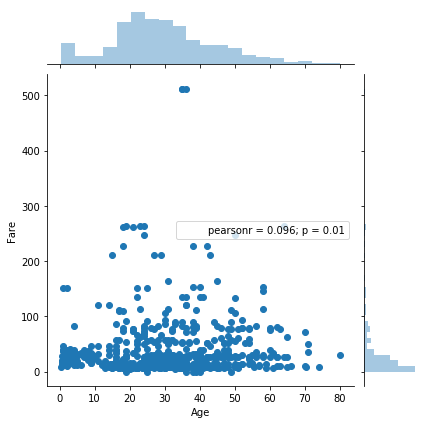

In [10]:
sns.jointplot(x = 'Age', y = 'Fare' , data = train_data)

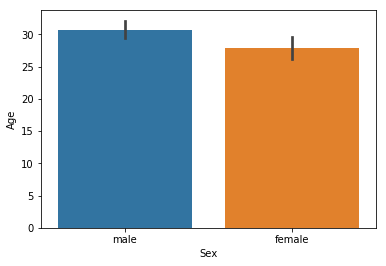

In [11]:
sns.barplot(x = "Sex" , y = "Age" , data = train_data)

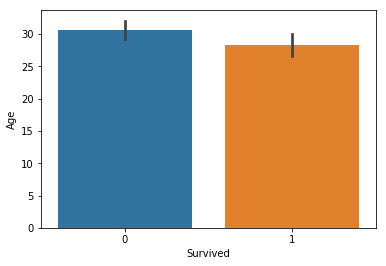

In [12]:
sns.barplot(x = "Survived" , y = "Age" , data = train_data)

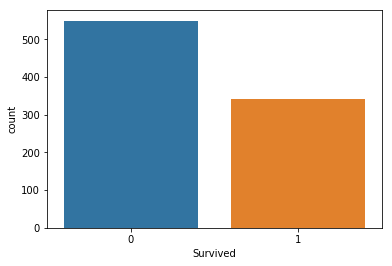

In [14]:
sns.countplot(x = "Survived", data = train_data)

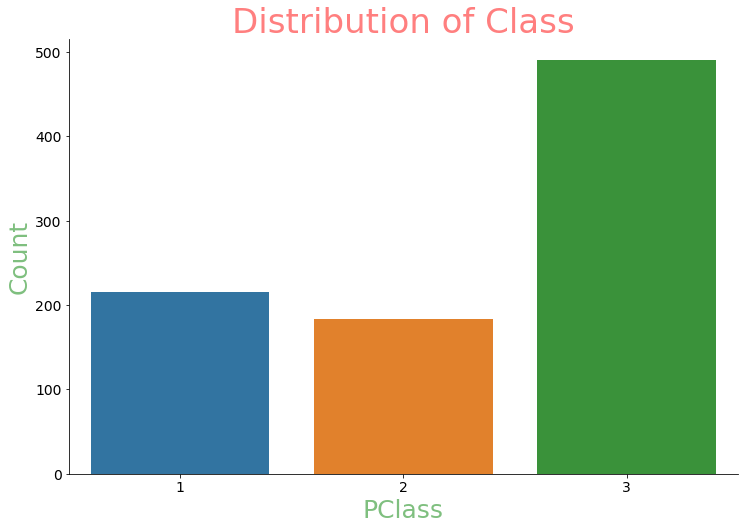

In [15]:
g = sns.countplot(x="Pclass", data=train_data)
g.figure.set_size_inches(12,8)
sns.despine() 
g.axes.set_title("Distribution of Class", color = 'r', alpha = 0.5, fontsize = 34) 
g.set_xlabel("PClass", color = 'g', alpha = 0.5, fontsize = 25)
g.set_ylabel("Count", color = 'g', alpha = 0.5, fontsize = 25)
g.tick_params(labelsize = 14, labelcolor = "black")

In [16]:
tic = train_data.pivot_table(index="Survived", columns="Sex", values="Age")

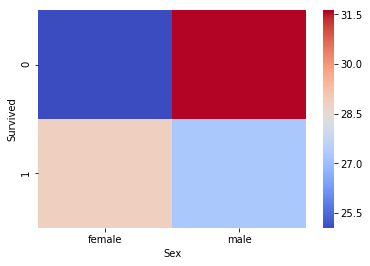

In [17]:
sns.heatmap(tic, cmap = "coolwarm")

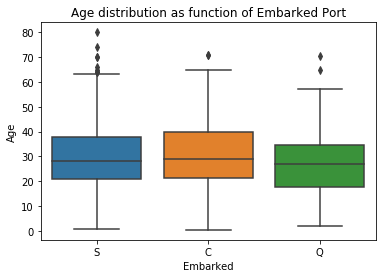

In [18]:
sns.boxplot(x='Embarked', y='Age', data=train_data)
plt.title("Age distribution as function of Embarked Port")
plt.show()

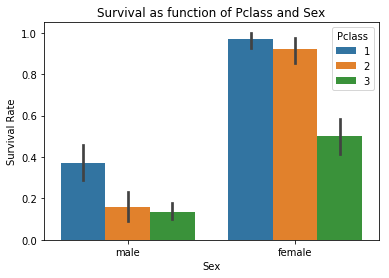

In [20]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()


## Task 2: Modeling -  Create a base model


